# <center>Laboratorium 11<br>Metody Numeryczne</center>

In [1]:
import numpy as np
import scipy.integrate as sp
import matplotlib.pyplot as plt

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z metodami całkowania numerycznego funkcji:  
$$
\int\limits_{a}^{b}f(x)dx 
$$  

Dana jest funkcja $f(x)$, należy wyznaczyć wartość całki tej funkcji na przedziale $a$,$b$.


***Zadanie 1.***    
Wyznacz numerycznie wartość całki:   
$$
\int\limits_{a}^{b}\log(1+\tan(x))dx 
$$

Wykonaj następujące czynności:

1. Czy możliwe jest całkowanie podanej funkcji na dowolnym przedziale? Swoją odpowiedź uzasadnij.
2. Oblicz całkę numerycznie na przedziale $a =0$, $b=\cfrac{\pi}{4}$ przy pomocy następujących metod:  
    1. Metoda Trapezów - [trapz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html#scipy.integrate.trapz)
    2. Metoda Simpsona - [simps](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps) 
    3. Metoda Romberga - [romb](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romb.html#scipy.integrate.romb)  
  
Sprawdź jak wyniki róźnią się od siebie, czy ma na nie wpływ długość wektora $\mathbf{y}$ oraz wartość parametru $dx$

3. Porównaj wyniki i czas obliczeń z punktu 1 z funkcjami:
    1. [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy-integrate-quad)
    2. [romberg](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html#scipy.integrate.romberg)
    3. [quadrature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html#scipy.integrate.quadrature)

1. Nie ponieważ funkcja tangens nie jest ciągła w całej swojej dziedzinie, a więc nie spełnia warunków całkowania.Możemy obliczyć wartości tej całki w przedziałach jej ciągłości ale nie dla dowolnego przedziału.

In [2]:
def f(x):
    return np.log(1 + np.tan(x))

step = [3,2,1,0.5,0.2,0.1,0.01,0.001,0.0001,0.00001,0.000001]
vectors = []
for i in step:
    vectors.append(np.arange(0,np.pi/4,i))




### Metoda trapezów


Text(0.5, 1.0, 'Wartość całki dla różnych wartości dx')

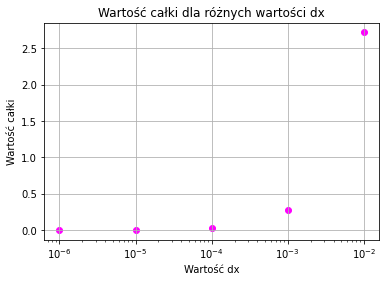

In [3]:

#Rozne dx
dx = [0.000001,0.00001,0.0001,0.001,0.01]
x = np.arange(0, np.pi/4, 0.001)


for d in dx:
    plt.scatter(d,sp.trapz(f(x), dx = d),color = 'magenta')
        
plt.xscale('log')
plt.grid()
plt.ylabel('Wartość całki')
plt.xlabel('Wartość dx')
plt.title("Wartość całki dla różnych wartości dx")




Text(0.5, 1.0, 'Wartość całki dla różnych ilości elementów wektora')

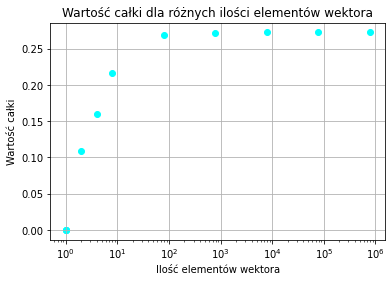

In [4]:
#Różne długości wektora


for i in vectors:
    integrate = sp.trapz(f(i),i)
    plt.scatter(len(i),integrate,color = 'cyan')
    
plt.grid()
plt.xscale('log')
plt.xlabel('Ilość elementów wektora')
plt.ylabel('Wartość całki')
plt.title("Wartość całki dla różnych ilości elementów wektora")


## Metoda simpsona

Text(0.5, 1.0, 'Wartość całki dla różnych wartości dx')

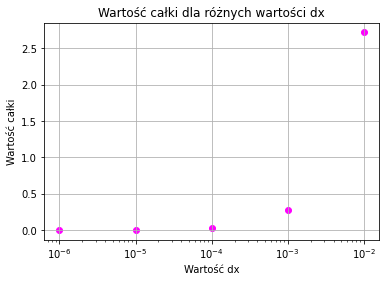

In [5]:
#Różne dx


for d in dx:
    plt.scatter(d,sp.simps(f(x), dx = d),color = 'magenta')
        
plt.xscale('log')
plt.grid()
plt.ylabel('Wartość całki')
plt.xlabel('Wartość dx')
plt.title("Wartość całki dla różnych wartości dx")



    


Text(0.5, 1.0, 'Wartość całki dla różnych ilości elementów wektora')

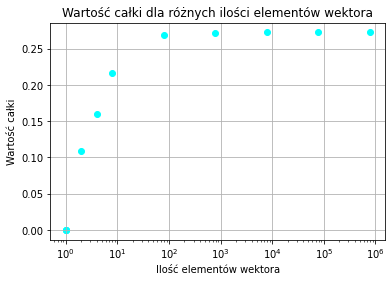

In [6]:
#Różne długości wektora


for i in vectors:
    integrate = sp.simps(f(i),i)
    plt.scatter(len(i),integrate,color = 'cyan')
    
plt.grid()
plt.xscale('log')
plt.xlabel('Ilość elementów wektora')
plt.ylabel('Wartość całki')
plt.title("Wartość całki dla różnych ilości elementów wektora")

### Metoda Romberga

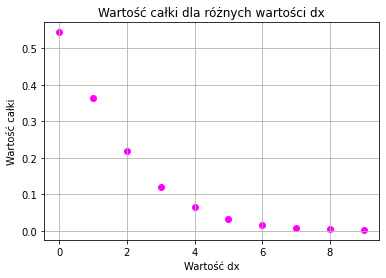

In [20]:

#Rozne dx

x1 = np.linspace(0, np.pi/4, 2**2 + 1)
for dx in range(0, 10):
    integral = sp.romb(f(x1), dx=np.pi/4/(2**dx + 1))
    plt.scatter(dx,integral,color = 'magenta')
    

plt.title('Wartość całki dla różnych wartości dx')
plt.xlabel("Wartość dx")
plt.ylabel("Wartość całki")

plt.grid()
plt.show()



Text(0.5, 1.0, 'Wartość całki dla różnych ilości elementów wektora')

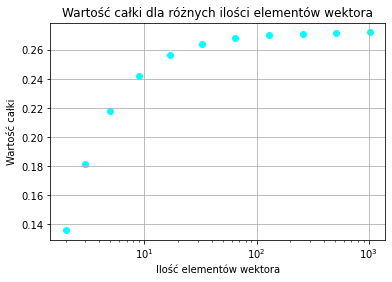

In [8]:
#Różne długości wektora


for i in range(0,11):
    x = np.linspace(0, np.pi/4, 2**i + 1)
    integrate = sp.romb(f(x), dx=np.pi/4/(2**i + 1))
    plt.scatter(len(x),integrate,color = 'cyan')
    
plt.grid()
plt.xscale('log')
plt.xlabel('Ilość elementów wektora')
plt.ylabel('Wartość całki')
plt.title("Wartość całki dla różnych ilości elementów wektora")

Jak widać, wartości dx wpływają na wynik całkowania, ponieważ wartość dx oznacza jaki jest odstęp pomiędzy punktami z wektora y. Jeżeli błędnie ustawimy wartość, dostaniemy zły wynik całki. Geometrycznie oznacza to, że wykres został ściśnięty lub rozciągnięty na osi x. Wykres po takiej transformacji może mieć inne pole pod krzywą. Najlepszy wynik otrzymaliśmy, gdy wartośc dx była najbliższa skokowi wektora.

Jeśli chodzi o wpływ długości wektora na wynik, to dla z każdej z metod obserwujemy znaczący wpływ. Im więcej elementów wektora, tym dokładniejsze wyniki otrzymujemy, jednak od pewnych wartości wyniki się stabilizują co oznacza, że powinniśmy się zastanowić czy otrzymane wyniki są dla nas wystarczające dokładne, czy chcemy zwiększyć dokładność kosztem dłuższego wykonywania funkcji. Metody Trapezów i Simpsona stabilizują dla ok 100 elementów. Metoda Romberga zaczyna stabilizować się troche wcześniej,bo gdy wektor przekroczy ok 10 elementów.

### Porównanie wyników

In [9]:
quad = sp.quad(f, 0, np.pi/4)[0]
romberg = sp.romberg(f, 0, np.pi/4)
quadrature = sp.quadrature(f, 0, np.pi/4)[0]

print(f'Wynik całkowania dla metody Quad: {quad }')
print(f'Wynik całkowania dla metody Romberg: {romberg}')
print(f'Wynik całkowania dla metody Quadrature:{quadrature}\n')



x = np.arange(0, np.pi/4, 0.0008)
x1 = np.linspace(0, np.pi/4, 2**10 + 1)
print("Ilośc elementów wektora ~ 1 tysiąc\n")
print(f'Wynik całkowania dla metody Trapzezów: {sp.trapz(f(x), x)}')
print(f'Wynik całkowania dla metody Simpsona: {sp.simps(f(x), x)}')
print(f'Wynik całkowania dla metody Romberga: {sp.romb(f(x1), dx=np.pi/4/(2**10 + 1))}\n')


x = np.arange(0, np.pi/4, 0.0002)
x1 = np.linspace(0, np.pi/4, 2**12 + 1)
print("Ilośc elementów wektora ~ 4 tysiące\n")
print(f'Wynik całkowania dla metody Trapzezów: {sp.trapz(f(x), x)}')
print(f'Wynik całkowania dla metody Simpsona: {sp.simps(f(x), x)}')
print(f'Wynik całkowania dla metody Romberga: {sp.romb(f(x1), dx=np.pi/4/(2**12 + 1))}\n')

x = np.arange(0, np.pi/4, 0.0001)
x1 = np.linspace(0, np.pi/4, 2**13 + 1)
   
print("Ilośc elementów wektora ~ 8 tysięcy\n")
print(f'Wynik całkowania dla metody Trapzezów: {sp.trapz(f(x), x)}')
print(f'Wynik całkowania dla metody Simpsona: {sp.simps(f(x), x)}')
print(f'Wynik całkowania dla metody Romberga: {sp.romb(f(x1), dx=np.pi/4/(2**13 + 1))}\n')


    


Wynik całkowania dla metody Quad: 0.27219826128795027
Wynik całkowania dla metody Romberg: 0.27219826128795016
Wynik całkowania dla metody Quadrature:0.27219826128795027

Ilośc elementów wektora ~ 1 tysiąc

Wynik całkowania dla metody Trapzezów: 0.2717838248477069
Wynik całkowania dla metody Simpsona: 0.27178382487951985
Wynik całkowania dla metody Romberga: 0.27193270200864494

Ilośc elementów wektora ~ 4 tysiące

Wynik całkowania dla metody Trapzezów: 0.27206092452012787
Wynik całkowania dla metody Simpsona: 0.2720609245207881
Wynik całkowania dla metody Romberga: 0.2721318228546361

Ilośc elementów wektora ~ 8 tysięcy

Wynik całkowania dla metody Trapzezów: 0.27213022442356166
Wynik całkowania dla metody Simpsona: 0.2721302244236435
Wynik całkowania dla metody Romberga: 0.272165038016708



Widzimy tutaj, że gdy zwiększymy długość naszego wektora, to wyniki metod Trapezów, Simpsona, i Ronberga zbliżają do wyników otrzymanych za pomocą funkcji Quad,Romberg i Quadrature. Dla wektora zawierającego tysiąc elementów mamy zgodność do 2 miejsc po przecinku.Dla 4 tysięcy elementów, dla metod Trapezów i Simpsona mamy zgodność do 3 miejsc po przecinku, a metoda Romberga jest w tym przypadku zgodna do 4 miejsc po przecinku.Dla 8 tysięcy elementów wszystkie metody są zgodne do 4 miejsc po przecinku.

### Testy czasowe

In [10]:
#Starałem się dobrać wektory tak, aby miały możliwie zbliżoną ilość elementów.
x = np.arange(0, np.pi/4, 0.0008)
x1 = np.linspace(0, np.pi/4, 2**10 + 1)
print("Ilość elementów wektorów ~ 1 tysiąc\n\n")

print(' Średni czas wykonania całkowania dla metody Trapezów: ')
trapz = %timeit -r 100 -n 100 -o sp.trapz(f(x), x=x)

print('\n','Średni czas wykonania całkowania dla metody Simpsona: ')
simps = %timeit -r 100 -n 100 -o sp.simps(f(x), x=x)

print('\n','Średni czas wykonania całkowania dla metody Romberga: ')
romb = %timeit -r 100 -n 100 -o sp.romb(f(x1), dx=2**10+1)

print('\n','Średni czas wykonania całkowania dla metody Quad: ')
quad = %timeit -r 100 -n 100 -o sp.quad(f, 0, np.pi/4)[0]

print('\n','Średni czas wykonania całkowania dla metody Romberg: ')
romberg = %timeit -r 100 -n 100 -o sp.romberg(f, 0, np.pi/4)

print('\n','Średni czas wykonania całkowania dla metody Quadrature: ')
quadrature =  %timeit -r 100 -n 100 -o sp.quadrature(f, 0, np.pi/4)[0]

Ilość elementów wektorów ~ 1 tysiąc


 Średni czas wykonania całkowania dla metody Trapezów: 
The slowest run took 4.26 times longer than the fastest. This could mean that an intermediate result is being cached.
48.1 µs ± 16.8 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

 Średni czas wykonania całkowania dla metody Simpsona: 
145 µs ± 35.7 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

 Średni czas wykonania całkowania dla metody Romberga: 
The slowest run took 4.91 times longer than the fastest. This could mean that an intermediate result is being cached.
192 µs ± 59.1 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

 Średni czas wykonania całkowania dla metody Quad: 
85 µs ± 17.9 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

 Średni czas wykonania całkowania dla metody Romberg: 
49.7 µs ± 14.2 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

 Średni czas wykonania całkowania dla metody Quadrature: 
59.6 µs ± 14.2 µs per 

Najwolniejsze okazały się metody Simpsona i Romberga, które zdecydowanie odstają od pozostałych. Najszybsze i zbliżone do
siebie wyniki uzyskały metoda Trapezów i Romberg. Troszkę gorzej od nich wypada metoda Quadrature.
Po środku wszystkich wyników uplasowała się metoda Quad. Porównując uzyskane wyniki jakościowe i czasowe, osobiście 
używałbym metod mające zmienny krok a konkretnie metod Romberg lub Quadrature.

***Zadanie 2.***  
Dla funkcji 

$$f(x) = e^{x^2}$$

wyznacz numerycznie wartośc całki na przedziale $a = 0$, $b=1$  w  taki sam sposób jak w zadaniu 1.

In [11]:
def g(x):
    return np.exp(x**2)

vectors = []

for i in step:
     vectors.append(np.arange(0,1,i))
        

    

### Metoda Trapezów

Text(0.5, 1.0, 'Wartość całki dla różnych wartości dx')

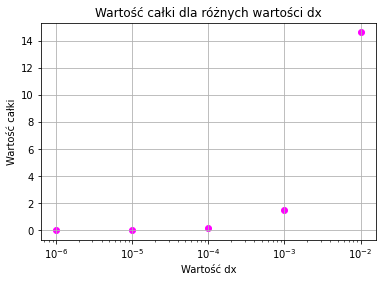

In [12]:
#Rozne dx
dx = [0.000001,0.00001,0.0001,0.001,0.01]
x = np.arange(0, 1, 0.001)


for d in dx:
    plt.scatter(d,sp.trapz(g(x), dx = d),color = 'magenta')
        
plt.xscale('log')
plt.grid()
plt.ylabel('Wartość całki')
plt.xlabel('Wartość dx')
plt.title("Wartość całki dla różnych wartości dx")


Text(0.5, 1.0, 'Wartość całki dla różnych ilości elementów wektora')

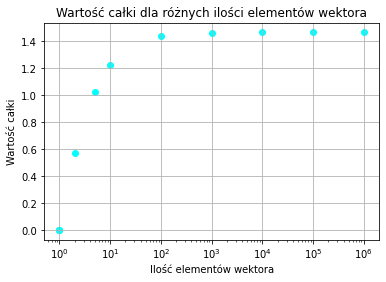

In [13]:
#Różne długości wektora


for i in vectors:
    integrate = sp.trapz(g(i),i)
    plt.scatter(len(i),integrate,color = 'cyan')
    
plt.grid()
plt.xscale('log')
plt.xlabel('Ilość elementów wektora')
plt.ylabel('Wartość całki')
plt.title("Wartość całki dla różnych ilości elementów wektora")

### Metoda Simpsona

Text(0.5, 1.0, 'Wartość całki dla różnych wartości dx')

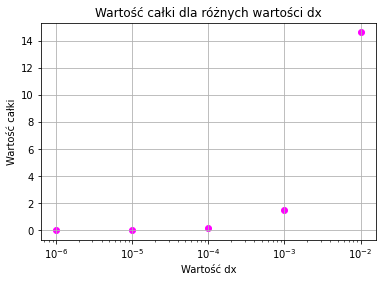

In [14]:
#Różne dx


for d in dx:
    plt.scatter(d,sp.simps(g(x), dx = d),color = 'magenta')
        
plt.xscale('log')
plt.grid()
plt.ylabel('Wartość całki')
plt.xlabel('Wartość dx')
plt.title("Wartość całki dla różnych wartości dx")

Text(0.5, 1.0, 'Wartość całki dla różnych ilości elementów wektora')

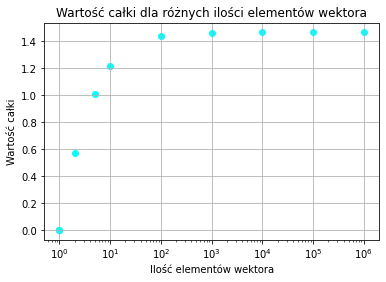

In [15]:
#Różne długości wektora


for i in vectors:
    integrate = sp.simps(g(i),i)
    plt.scatter(len(i),integrate,color = 'cyan')
    
plt.grid()
plt.xscale('log')
plt.xlabel('Ilość elementów wektora')
plt.ylabel('Wartość całki')
plt.title("Wartość całki dla różnych ilości elementów wektora")


### Metoda Romberga

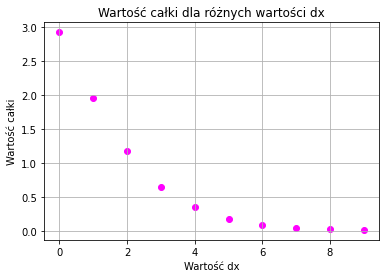

In [32]:
#Rozne dx

x1 = np.linspace(0, 1, 2**2 + 1)
for dx in range(0, 10):
    integral = sp.romb(g(x1), dx=1/(2**dx + 1))
    plt.scatter(dx,integral,color = 'magenta')
    

plt.title('Wartość całki dla różnych wartości dx')
plt.xlabel("Wartość dx")
plt.ylabel("Wartość całki")

plt.grid()
plt.show()


Text(0.5, 1.0, 'Wartość całki dla różnych ilości elementów wektora')

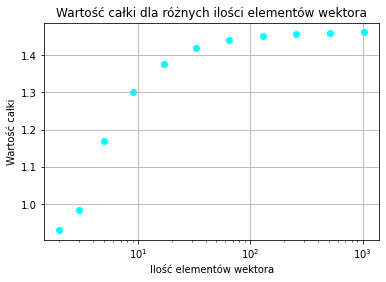

In [30]:
#Różne długości wektora


for i in range(0,11):
    x = np.linspace(0, 1, 2**i + 1)
    integrate = sp.romb(g(x), dx=1/(2**i + 1))
    plt.scatter(len(x),integrate,color = 'cyan')
    
plt.grid()
plt.xscale('log')
plt.xlabel('Ilość elementów wektora')
plt.ylabel('Wartość całki')
plt.title("Wartość całki dla różnych ilości elementów wektora")

### Porównanie wyników

In [29]:
quad = sp.quad(g, 0, 1)[0]
romberg = sp.romberg(g, 0, 1)
quadrature = sp.quadrature(g, 0, 1)[0]

print(f'Wynik całkowania dla metody Quad: {quad }')
print(f'Wynik całkowania dla metody Romberg: {romberg}')
print(f'Wynik całkowania dla metody Quadrature:{quadrature}\n')



x = np.arange(0, 1, 0.0008)
x1 = np.linspace(0, 1, 2**10 + 1)
print("Ilośc elementów wektora ~ 1 tysiąc\n")
print(f'Wynik całkowania dla metody Trapzezów: {sp.trapz(g(x), x)}')
print(f'Wynik całkowania dla metody Simpsona: {sp.simps(g(x), x)}')
print(f'Wynik całkowania dla metody Romberga: {sp.romb(g(x1), dx=1 /(2**10 + 1))}\n')


x = np.arange(0, 1, 0.0002)
x1 = np.linspace(0, 1, 2**12 + 1)
print("Ilośc elementów wektora ~ 4 tysiące\n")
print(f'Wynik całkowania dla metody Trapzezów: {sp.trapz(g(x), x)}')
print(f'Wynik całkowania dla metody Simpsona: {sp.simps(g(x), x)}')
print(f'Wynik całkowania dla metody Romberga: {sp.romb(g(x1), dx= 1/(2**12 + 1))}\n')

x = np.arange(0, 1, 0.0001)
x1 = np.linspace(0, 1, 2**13 + 1)
   
print("Ilośc elementów wektora ~ 8 tysięcy\n")
print(f'Wynik całkowania dla metody Trapzezów: {sp.trapz(g(x), x)}')
print(f'Wynik całkowania dla metody Simpsona: {sp.simps(g(x), x)}')
print(f'Wynik całkowania dla metody Romberga: {sp.romb(g(x1), dx = 1/(2**13 + 1))}\n')



Wynik całkowania dla metody Quad: 1.4626517459071815
Wynik całkowania dla metody Romberg: 1.4626517459101032
Wynik całkowania dla metody Quadrature:1.4626517458962958

Ilośc elementów wektora ~ 1 tysiąc

Wynik całkowania dla metody Trapzezów: 1.4604791480090293
Wynik całkowania dla metody Simpsona: 1.4604788591432931
Wynik całkowania dla metody Romberga: 1.4612247685941013

Ilośc elementów wektora ~ 4 tysiące

Wynik całkowania dla metody Trapzezów: 1.4621082163620296
Wynik całkowania dla metody Simpsona: 1.4621081982571187
Wynik całkowania dla metody Romberga: 1.462294740355337

Ilośc elementów wektora ~ 8 tysięcy

Wynik całkowania dla metody Trapzezów: 1.4623799494335468
Wynik całkowania dla metody Simpsona: 1.4623799449051984
Wynik całkowania dla metody Romberga: 1.4624732213440295



Wszystkie metody wypadają podobnie, trochę gorzej niż w 1 zadaniu.Może to zależeć od funkcji, którą całkujemy.

### Testy czasowe

In [33]:
#Starałem się dobrać wektory tak, aby miały możliwie zbliżoną ilość elementów.
x = np.arange(0, 1, 0.000999)
x1 = np.linspace(0, 1, 2**10 + 1)


print("Ilość elementów wektorów ~ 1 tysiąc\n\n")

print(' Średni czas wykonania całkowania dla metody Trapezów: ')
trapz = %timeit -r 100 -n 100 -o sp.trapz(g(x), x=x)

print('\n','Średni czas wykonania całkowania dla metody Simpsona: ')
simps = %timeit -r 100 -n 100 -o sp.simps(g(x), x=x)

print('\n','Średni czas wykonania całkowania dla metody Romberga: ')
romb = %timeit -r 100 -n 100 -o sp.romb(g(x1), dx=1/(2**10+1))

print('\n','Średni czas wykonania całkowania dla metody Quad: ')
quad = %timeit -r 100 -n 100 -o sp.quad(g, 0, 1)[0]

print('\n','Średni czas wykonania całkowania dla metody Romberg: ')
romberg = %timeit -r 100 -n 100 -o sp.romberg(g, 0, 1)



print('\n','Średni czas wykonania całkowania dla metody Quadrature: ')
quadrature =  %timeit -r 100 -n 100 -o sp.quadrature(g, 0, 1)[0]

Ilość elementów wektorów ~ 1 tysiąc


 Średni czas wykonania całkowania dla metody Trapezów: 
36.5 µs ± 9.23 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

 Średni czas wykonania całkowania dla metody Simpsona: 
108 µs ± 18 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

 Średni czas wykonania całkowania dla metody Romberga: 
129 µs ± 8.96 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

 Średni czas wykonania całkowania dla metody Quad: 
33.2 µs ± 5.35 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

 Średni czas wykonania całkowania dla metody Romberg: 
204 µs ± 9.09 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)

 Średni czas wykonania całkowania dla metody Quadrature: 
152 µs ± 10.5 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


W tym wypadku najszybsze i znacznie odbiegające od pozostałych okazały się metody Trapezów i Quad. Następnie mamy metody:
- Simpsona - 3 razy wolniejsza
- Romberga - 4 razy wolniejsza
- Quadrature - 5-6 razy wolniejsza
- Romberg - 7-8 razy wolniejsza.


Widzimy tutaj, że to jaką funkcję całkujemy ma również wpływ na przebieg czasowy naszych metod.

 Porównując testy dokładności i czasowe,w tym przypadku wybrałbym bym metodę Quad.

Wnioski

Na tym laboratorium miałem okazję zaznajomić się z numerycznymi metodami obliczania całek. Niejednokrotnie na zajęciach
z analizy matematycznej lub na innych przedmiotach mówiono, że danej całki nie obliczymy w sposób analityczny a tylko numeryczny.
Teraz już wiem co mieli na myśli prowadzący i jak obliczyć całki numerycznie.Jest to w mojej opinii ważne zagadnienie,gdyż jest bardzo dużo funkcji, których nie potrafimy całkować analitycznie a być może będziemy potrzebować wartości ich całki.
Komentarze do poszczególnych metod zawarłem po użyciu ich w zadaniu. Co ważne,to jaką metodę użyjemy powinno zależeć od tego
jaką funkcję musimy całkować, gdyż w zależności od tego jaką funkcję mamy to różne metody mogą być bardziej optymalne.